# Classification Model

5-fold classification code for BraTS2019 dataset (RGBA images - 4 channels).

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import fastai
from fastai.vision import *
from fastai.metrics import error_rate
import os
import pandas as pd
from collections import Counter

import warnings
warnings.filterwarnings('ignore')
import numpy as np
from pathlib import Path

from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn.metrics import roc_curve,auc

In [2]:
import torch
torch.cuda.set_device(0)
torch.cuda.current_device()

0

In [3]:
!pip install fastai==1.0.61 --no-deps
# !pip install torch==1.4 torchvision==0.5.0

Set batch size according to useable memory and imsize according to model needs.

In [4]:
import fastai; fastai.__version__

'1.0.61'

In [5]:
bs = 32
imsize = 96

np.random.seed(2)

# Training

In [6]:
# import torch.nn as nn

class FocalLoss(nn.Module):
    def __init__(self, alpha, gamma):
        super().__init__()
        self.alpha = alpha
        self.gamma = gamma

    def forward(self, inputs, targets, **kwargs):
        CE_loss = nn.CrossEntropyLoss(reduction='none')(inputs, targets)
        pt = torch.exp(-CE_loss)
        F_loss = self.alpha * ((1-pt)**self.gamma) * CE_loss
        return F_loss.mean()

In [7]:
def view_result(learn):
    interp = ClassificationInterpretation.from_learner(learn)
    interp.plot_confusion_matrix()
#     plt.savefig('confusion_matrix.png')
    
    preds,y, loss = learn.get_preds(with_loss=True)

    # get accuracy
    acc = accuracy(preds, y)
    print('Validation set: the accuracy is {0}.'.format(acc))

    # F1 score
    pred_valid = np.argmax(preds, axis=1)
    
    F1_validation=f1_score(pred_valid, y,average='weighted')
    print('Validation set: F1_score is {0}.'.format(F1_validation)) 
    
    pred_id, lables_pred = torch.max(preds,dim=1)
    lables_true=y
    
    lables_true_array = y.numpy() # fron tensot to array
    lables_pred_array=lables_pred.numpy()
    
    lables_true_array = y.numpy() # fron tensot to array
    lables_pred_array=lables_pred.numpy()
    
    # # Majority of Votes:

    MV_labels = [];                                          # majority of votes decision list
    MV_predicted_labels = []
    for i in range(0, len(lables_pred_array),5):               
        curr_patient = lables_pred_array[i:i+5]              # running on each patient
        occurances = Counter(curr_patient)                   # finding how many times each prediction was appeared
        max_key = max(occurances, key = occurances.get)      # extracting the most common appearance
        MV_labels.append(max_key) 
    #     print("for patient "+str(i)+' the *predicted* diagnosos is '+str(max_key))
        MV_predicted_labels.append(max_key)

    MV_True_labels = [];                                     # majority of votes decision list
    for i in range(0, len(lables_true_array),5):               
        curr_patient = lables_true_array[i:i+5]              # running on each patient
        occurances = Counter(curr_patient)                   # finding how many times each prediction was appeared
        max_key = max(occurances, key = occurances.get)      # extracting the most common appearance
        MV_True_labels.append(max_key) 
    #     print("for patient "+str(i)+' the *True* diagnosos is '+str(max_key))

    lst=[]
    for i in range(len(MV_True_labels)):    
        if MV_True_labels[i] == MV_labels[i]:  
    #         print("patient" +str(i+1)+" TRUE prediction")
            lst.append("TRUE")
        else:  
    #         print("patient" +str(i+1)+" FALSE prediction")
            lst.append("FALSE")
        
    # Accuracy after majority of votes:
    acc_MV = lst.count("TRUE")/len(MV_True_labels)
    print('Validation set: Accuracy after majority of votes is {0}.' .format(acc_MV))
    # F1 score
    F1_validation=f1_score(MV_predicted_labels, MV_True_labels, average='weighted')
    print('Validation set: F1_score after majority of votes is {0}.'.format(F1_validation))
    
    
    # Confusion Matrix after majority of votes:
    cf = confusion_matrix(MV_predicted_labels, MV_True_labels)
    cf
    # disp = ConfusionMatrixDisplay(cf,display_labels=classes)
    # disp.plot(xticks_rotation='vertical',cmap=plt.cm.Blues)
    # plt.title('Confusion Matrix - validation set after majority of votes')
    # plt.show()
    


In [8]:
def new_model(*args, **kwargs):
   
    model = models.resnet152(*args, **kwargs)
    model.conv1 = nn.Conv2d(4, 64, kernel_size=7, stride=2, padding=3, bias=False)

    return model


Training fold 1:


epoch,train_loss,valid_loss,accuracy,time
0,0.241973,0.251171,0.411111,00:08
1,0.138263,0.046720,0.705556,00:09


Better model found at epoch 0 with accuracy value: 0.41111111640930176.
Better model found at epoch 1 with accuracy value: 0.7055555582046509.


Validation set: the accuracy is 0.7055555582046509.
Validation set: F1_score is 0.6695576454197144.
Validation set: Accuracy after majority of votes is 0.7222222222222222.
Validation set: F1_score after majority of votes is 0.688034188034188.
//////////////////////////////
Training fold 2:


epoch,train_loss,valid_loss,accuracy,time
0,0.194652,14.089253,0.211111,00:09
1,0.114731,0.073994,0.783333,00:08


Better model found at epoch 0 with accuracy value: 0.21111111342906952.
Better model found at epoch 1 with accuracy value: 0.7833333611488342.


Validation set: the accuracy is 0.7833333611488342.
Validation set: F1_score is 0.7792688792688793.
Validation set: Accuracy after majority of votes is 0.8333333333333334.
Validation set: F1_score after majority of votes is 0.8333333333333334.
//////////////////////////////
Training fold 3:


epoch,train_loss,valid_loss,accuracy,time
0,0.226744,0.146074,0.450000,00:11
1,0.133830,0.101403,0.683333,00:09


Better model found at epoch 0 with accuracy value: 0.44999998807907104.
Better model found at epoch 1 with accuracy value: 0.6833333373069763.


Validation set: the accuracy is 0.6833333373069763.
Validation set: F1_score is 0.6578878130114879.
Validation set: Accuracy after majority of votes is 0.6666666666666666.
Validation set: F1_score after majority of votes is 0.6486042692939243.
//////////////////////////////
Training fold 4:


epoch,train_loss,valid_loss,accuracy,time
0,0.179745,0.096611,0.700000,00:10
1,0.110094,0.118591,0.577778,00:08


Better model found at epoch 0 with accuracy value: 0.699999988079071.


Validation set: the accuracy is 0.699999988079071.
Validation set: F1_score is 0.6716266011580979.
Validation set: Accuracy after majority of votes is 0.6944444444444444.
Validation set: F1_score after majority of votes is 0.6633986928104575.
//////////////////////////////
Training fold 5:


epoch,train_loss,valid_loss,accuracy,time
0,0.230231,0.592645,0.622222,00:10
1,0.140905,0.047222,0.816667,00:09


Better model found at epoch 0 with accuracy value: 0.6222222447395325.
Better model found at epoch 1 with accuracy value: 0.8166666626930237.


Validation set: the accuracy is 0.8166666626930237.
Validation set: F1_score is 0.8205836373110996.
Validation set: Accuracy after majority of votes is 0.8333333333333334.
Validation set: F1_score after majority of votes is 0.8473118279569892.
//////////////////////////////


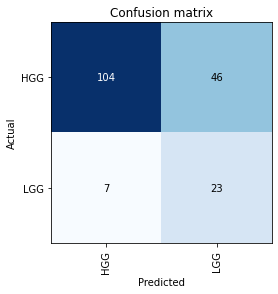

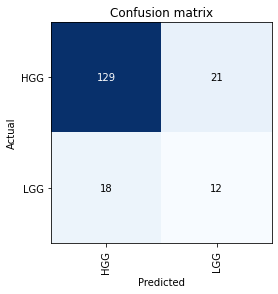

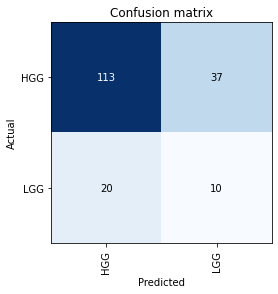

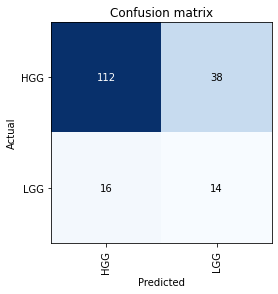

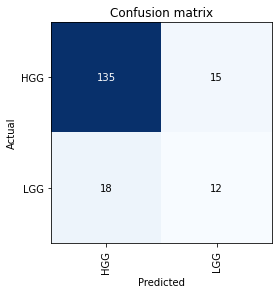

In [15]:
path = #BLINDED
path_images = Path(path + '/TRAIN_images')

epochs = 2
lr=1e-02 # 0.01
loss_func = FocalLoss(alpha=0.25, gamma=2) # best - .81 - (alpha=0.2, gamma=3)

for i_fold in range(1,6):
    
    df=pd.read_csv(path+f'/TRAIN_FOLD{i_fold}.csv') 

    IS_VALID="Val"

    # Creating augmentation
    tfms = get_transforms(do_flip=True,flip_vert=True, max_rotate=2.0, max_lighting=0.5, max_zoom=0)

    data = (ImageList.from_df(df, path_images, suffix='.TIFF',convert_mode='RGBA')
           .split_from_df(IS_VALID)
           .label_from_df()
           .transform(tfms, size=imsize)
           .databunch(bs=bs))
    
    
    print(f'Training fold {i_fold}:')
    learn = cnn_learner(data, new_model, metrics=[accuracy],callback_fns=[callbacks.OverSamplingCallback],loss_func=loss_func, wd=0.001,ps=0.5)
    learn.fit_one_cycle(epochs, max_lr=slice(lr/3,lr), callbacks=[callbacks.SaveModelCallback(learn, every='improvement', monitor='accuracy',name='best')]) # save the best mode
    view_result(learn)
          
    learn.save(f"Classification_model_fold{i_fold}")
    learn.export(f'models/Classification_model{i_fold}.pkl')
    print('//////////////////////////////')